1은 cmd를 이용해 파일을 불러옴

2는 os 모듈을 이용하여 파일을 불러옴

In [178]:
import os
import pandas as pd

In [179]:
path = 'G:\\내 드라이브\\dataset\\x-ray\\'

In [206]:
img_list1 = path + 'train\\NORMAL\\' + pd.DataFrame({'path' : os.listdir(path +'train\\NORMAL')})
img_list1['class'] = 0

img_list2 = path + 'train\\PNEUMONIA\\' + pd.DataFrame({'path' : os.listdir(path +'train\\PNEUMONIA')})
img_list2['class'] = 1
# img_list2 = path + 'train\\PNEUMONIA' + pd.DataFrame({'PNEUMONIA' : os.listdir(path +'train\\PNEUMONIA')})


In [207]:
trainname = pd.concat([img_list1, img_list2])

In [208]:
trainname

,path,class
0,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0115-0...,0
1,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0117-0...,0
2,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0119-0...,0
3,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0122-0...,0
4,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0125-0...,0
...,...,...
3870,G:\내 드라이브\dataset\x-ray\train\PNEUMONIA\person...,1
3871,G:\내 드라이브\dataset\x-ray\train\PNEUMONIA\person...,1
3872,G:\내 드라이브\dataset\x-ray\train\PNEUMONIA\person...,1
3873,G:\내 드라이브\dataset\x-ray\train\PNEUMONIA\person...,1


In [210]:
img_list1 = path + 'test\\NORMAL\\' + pd.DataFrame({'path' : os.listdir(path +'test\\NORMAL')})
img_list1['class'] = 0

img_list2 = path + 'test\\PNEUMONIA\\' + pd.DataFrame({'path' : os.listdir(path +'test\\PNEUMONIA')})
img_list2['class'] = 1
# img_list2 = path + 'train\\PNEUMONIA' + pd.DataFrame({'PNEUMONIA' : os.listdir(path +'train\\PNEUMONIA')})


In [211]:
testname = pd.concat([img_list1, img_list2])

In [212]:
testname

,path,class
0,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0001-00...,0
1,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0003-00...,0
2,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0005-00...,0
3,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0006-00...,0
4,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0007-00...,0
...,...,...
385,G:\내 드라이브\dataset\x-ray\test\PNEUMONIA\person9...,1
386,G:\내 드라이브\dataset\x-ray\test\PNEUMONIA\person9...,1
387,G:\내 드라이브\dataset\x-ray\test\PNEUMONIA\person9...,1
388,G:\내 드라이브\dataset\x-ray\test\PNEUMONIA\person9...,1


In [213]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torchvision import datasets, models, transforms
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

import pandas as pd

In [214]:
trainname

,path,class
0,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0115-0...,0
1,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0117-0...,0
2,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0119-0...,0
3,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0122-0...,0
4,G:\내 드라이브\dataset\x-ray\train\NORMAL\IM-0125-0...,0
...,...,...
3870,G:\내 드라이브\dataset\x-ray\train\PNEUMONIA\person...,1
3871,G:\내 드라이브\dataset\x-ray\train\PNEUMONIA\person...,1
3872,G:\내 드라이브\dataset\x-ray\train\PNEUMONIA\person...,1
3873,G:\내 드라이브\dataset\x-ray\train\PNEUMONIA\person...,1


In [215]:
testname

,path,class
0,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0001-00...,0
1,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0003-00...,0
2,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0005-00...,0
3,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0006-00...,0
4,G:\내 드라이브\dataset\x-ray\test\NORMAL\IM-0007-00...,0
...,...,...
385,G:\내 드라이브\dataset\x-ray\test\PNEUMONIA\person9...,1
386,G:\내 드라이브\dataset\x-ray\test\PNEUMONIA\person9...,1
387,G:\내 드라이브\dataset\x-ray\test\PNEUMONIA\person9...,1
388,G:\내 드라이브\dataset\x-ray\test\PNEUMONIA\person9...,1


In [216]:
x_class = [
    'NORMAL',
    'PNEUMONIA'
]

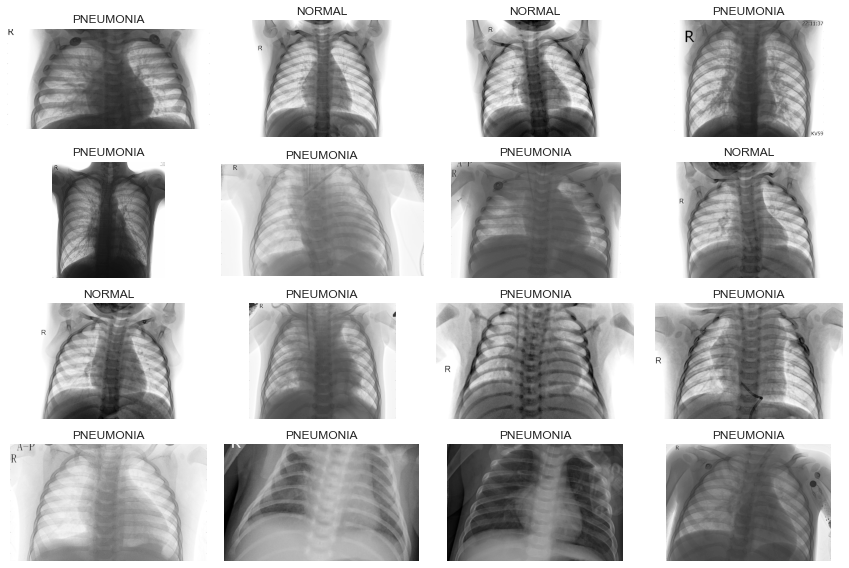

In [218]:
plt.style.use('seaborn-white')


plt.figure(figsize=(12,8))
for n, (idx, row) in enumerate(trainname.sample(16).iterrows(), start=1):
    plt.subplot(4,4, n)
    img = plt.imread(row['path'])
    plt.imshow(img)
    plt.title(x_class[row['class']])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [219]:
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, data, transforms):
        self.data = data
        self.transforms = transforms

    def __len__(self):
        # return len(self.file)
        return self.data.shape[0]

    def __getitem__(self, idx: int): # custom_path : 'train/NORMAL/'
        # assert idx <= len(self), 'index range error'
        
        image = plt.imread(self.data.iloc[idx, ]['path']) ## PIL 불러오기
        image = transforms.ToPILImage()(image)

        target = torch.as_tensor(self.data.iloc[idx, ]['class'])

        if self.transforms is not None:
            image = self.transforms(image)

        return image, target

In [220]:
transforms_train = transforms.Compose([        ### torch vision transform
    transforms.Grayscale(num_output_channels=1), # 채널 3개라고 오류나서 1개로 변경
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

transforms_test = transforms.Compose([        ### torch vision transform
    transforms.Grayscale(num_output_channels=1), # 채널 3개라고 오류나서 1개로 변경
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=0.5, std=0.5)
])

In [221]:
train_dataset = CustomImageDataset(data = trainname, transforms=transforms_train)
test_dataset = CustomImageDataset(data = testname, transforms=transforms_train)

In [222]:
len(next(iter(train_dataset))[0][0][0])

224

In [223]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=256, shuffle=True)

In [224]:
for X, y in train_dataloader:
    print("aaaa")
    break

for X, y in test_dataloader:
    print("bbbb")
    break

aaaa
bbbb


In [116]:
# 학습에 사용할 CPU나 GPU 장치를 얻습니다.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# 모델을 정의합니다.
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(224*224, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=50176, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [117]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)

        # 역전파
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")


epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.263821  [    0/ 5216]
Test Error: 
 Accuracy: 71.8%, Avg loss: 1.602784 

Epoch 2
-------------------------------
loss: 0.418733  [    0/ 5216]
Test Error: 
 Accuracy: 76.8%, Avg loss: 0.675593 

Epoch 3
-------------------------------
loss: 0.123364  [    0/ 5216]
Test Error: 
 Accuracy: 76.6%, Avg loss: 0.777239 

Epoch 4
-------------------------------
loss: 0.144651  [    0/ 5216]
Test Error: 
 Accuracy: 78.2%, Avg loss: 0.662916 

Epoch 5
-------------------------------
loss: 0.093156  [    0/ 5216]
Test Error: 
 Accuracy: 76.9%, Avg loss: 0.814655 

Done!
